In [66]:
#Load required libraries
import os
import csv
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import matplotlib.pyplot as plt
import pandas as pd
from nltk.stem import PorterStemmer
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

## Connect Twitter

In [7]:
#Store required keys
consumer_key = "dD4i6dIp7mQLLALBd26rHw"
consumer_secret = "kSdjITYWdMGkK0RkfNtMNejuiOaOrqZtezOzFJ2NzQ"
access_key = "1945980420-WLnsskYxAdHM411Fnqry7Oubz0NVT2juwP6pySo"
access_secret = "Xwg1KbAKQzqeWvIXcxAE2FE2xMJpxhgdEuRH0N6MCJBN9"

In [8]:
#Establish connection
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

In [68]:
#Extract tweets
#Create empty list
results = []

#Get the first 500 items based on the search query
for tweet in tweepy.Cursor(api.search, q = 'aajtak').items(1000):
    results.append(tweet)

In [69]:
# Verify the number of items returned
print(len(results))

1000


In [70]:
#Convert list into dataframe
def toDataFrame(tweets):
    #Create empty data frame
    DataSet = pd.DataFrame()
    
    #extract relevant information
    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]
    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userCreateDt'] = [tweet.user.created_at for tweet in tweets]
    DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet in tweets]
    DataSet['userFriendsCt'] = [tweet.user.friends_count for tweet in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet in tweets]

    return DataSet

In [71]:
#Pass the tweets list to the above function to create a DataFrame
DataSet = toDataFrame(results)

In [72]:
#intializing Lemmatizer
lemma=WordNetLemmatizer()

In [73]:
corpus=[]
for i in range(len(DataSet)):
    review=re.sub('[^a-zA-Z]', " ",DataSet["tweetText"][i])
    review=review.lower()
    review=review.split()
    review=[lemma.lemmatize(word) for word in review if not word in set(stopwords.words('english')) ]
    review=' '.join(review)
    corpus.append(review)

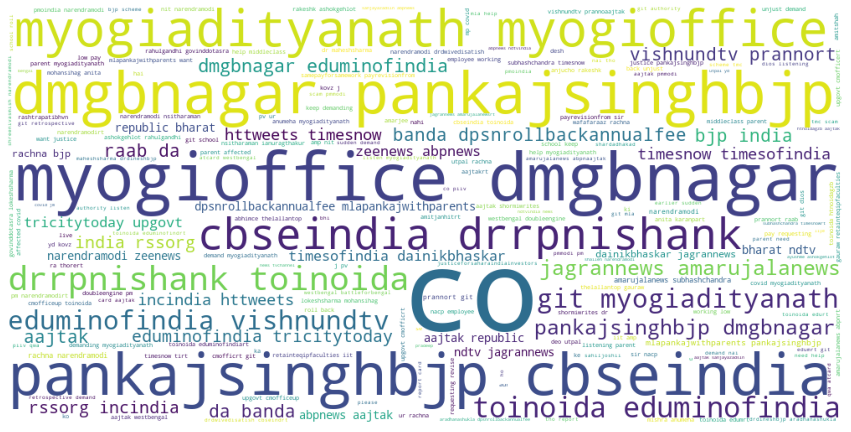

In [74]:
#Plot wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(
                        ''.join(corpus))

plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()